In [70]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [71]:
vartiable=pd.read_csv('data/VariableDefinitions.csv')
data=pd.read_csv('data/train.csv')
sample=pd.read_csv('data/SampleSubmission.csv')
exam=pd.read_csv('data/test.csv')

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [73]:
vartiable

,Column Name,Definition
0,id,Unique identifier for each tourist
1,country,The country a tourist coming from.
2,age_group,The age group of a tourist.
3,travel_with,The relation of people a tourist travel with t...
4,total_female,Total number of females
5,total_male,Total number of males
6,purpose,The purpose of visiting Tanzania
7,main_activity,The main activity of tourism in Tanzania
8,infor_source,The source of information about tourism in Tan...
9,tour_arrangment,The arrangment of visiting Tanzania


In [74]:
data.most_impressing.value_counts()

most_impressing
Friendly People                         1541
 Wildlife                               1038
No comments                              743
Wonderful Country, Landscape, Nature     507
Good service                             365
Excellent Experience                     271
Satisfies and Hope Come Back              31
Name: count, dtype: int64

In [75]:
data.travel_with.value_counts()

travel_with
Alone                  1265
Spouse                 1005
Friends/Relatives       895
Spouse and Children     368
Children                162
Name: count, dtype: int64

In [76]:
data.package_guided_tour.unique()

array(['No', 'Yes'], dtype=object)

# Data cleaningin and feature engineering

In [77]:
#most_impressing
# merge Excellent service Satifies...
# nan meaning no comments or most said category

#travel_with
# look at total_male and total_female
# check purpose

#drop nan ins total_female and total_male

#package features to True/False or 0/1

(sum(data.total_female.isna())+sum(data.total_male.isna()))/len(data)

0.0016635475150758993

We loose 0.16% of data if nan's in "total_male" and "total_female" are dropped.

In [78]:
#drop rows with total_male or total_feamle is nan
data = data.dropna(subset=['total_male', 'total_female'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4801 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4801 non-null   object 
 1   country                4801 non-null   object 
 2   age_group              4801 non-null   object 
 3   travel_with            3688 non-null   object 
 4   total_female           4801 non-null   float64
 5   total_male             4801 non-null   float64
 6   purpose                4801 non-null   object 
 7   main_activity          4801 non-null   object 
 8   info_source            4801 non-null   object 
 9   tour_arrangement       4801 non-null   object 
 10  package_transport_int  4801 non-null   object 
 11  package_accomodation   4801 non-null   object 
 12  package_food           4801 non-null   object 
 13  package_transport_tz   4801 non-null   object 
 14  package_sightseeing    4801 non-null   object 
 15  package_g

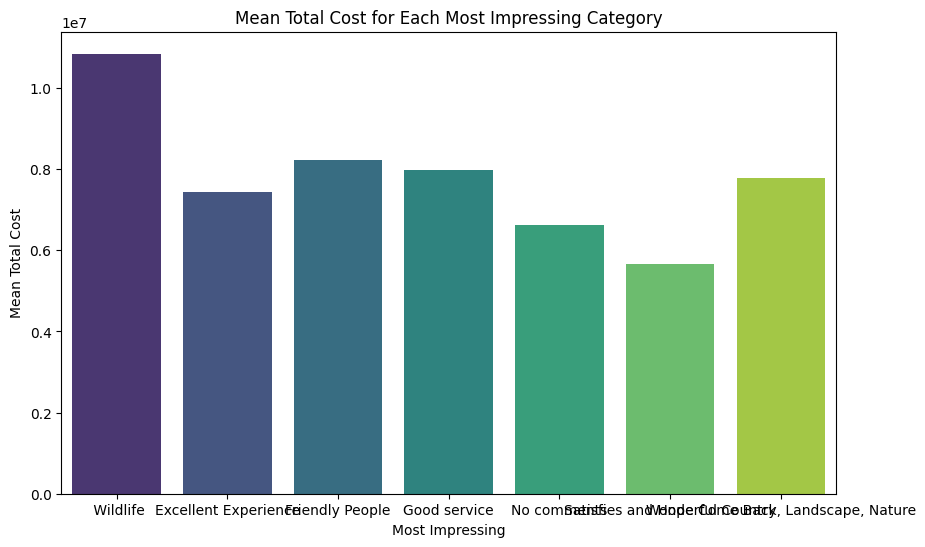

array(['Friendly People', 'Wonderful Country, Landscape, Nature',
       'Excellent Experience', 'No comments', ' Wildlife', 'Good service',
       'Satisfies and Hope Come Back'], dtype=object)

In [79]:
# fill na in most_impressing
import matplotlib.pyplot as plt
import seaborn as sns

grouped_data = data.groupby('most_impressing')['total_cost'].mean().reset_index()

# Rename the columns for clarity
grouped_data.columns = ['most_impressing', 'mean_total_cost']

# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='most_impressing', y='mean_total_cost', data=grouped_data, palette='viridis')

# Adding titles and labels
plt.title('Mean Total Cost for Each Most Impressing Category')
plt.xlabel('Most Impressing')
plt.ylabel('Mean Total Cost')

# Show plot
plt.show()

data.most_impressing = data.most_impressing.fillna("Friendly People")

data.most_impressing.unique()

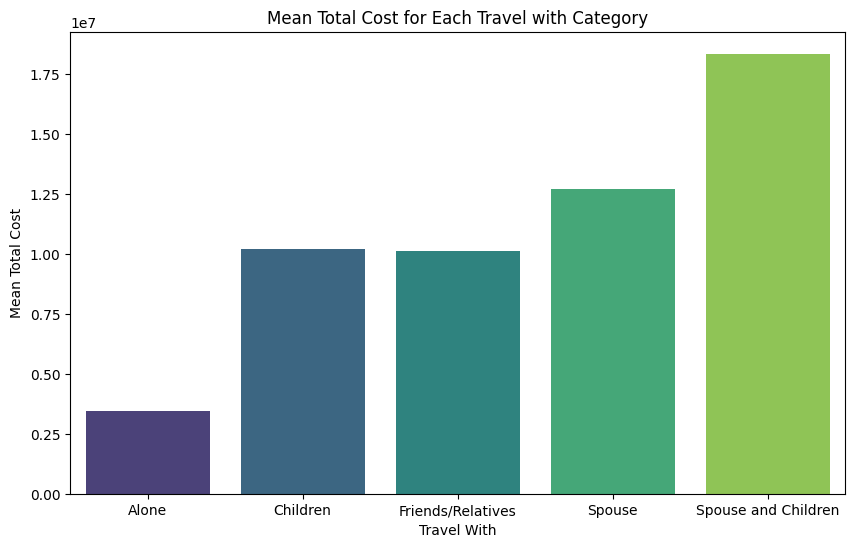

In [80]:
#fill na in travel with
grouped_data = data.groupby('travel_with')['total_cost'].mean().reset_index()

# Rename the columns for clarity
grouped_data.columns = ['travel_with', 'mean_total_cost']

# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='travel_with', y='mean_total_cost', data=grouped_data, palette='viridis')

# Adding titles and labels
plt.title('Mean Total Cost for Each Travel with Category')
plt.xlabel('Travel With')
plt.ylabel('Mean Total Cost')

# Show plot
plt.show()

In [81]:
nan_travel_with = data[data.travel_with.isna()][["travel_with", "total_male", "total_female"]]
print(sum(nan_travel_with.total_male) + sum(nan_travel_with.total_female))

print(len(nan_travel_with))

filtered_data = nan_travel_with[(nan_travel_with['total_female'] == 0) & (nan_travel_with['total_male'] == 1) | (nan_travel_with['total_female'] == 1) & (data['total_male'] == 0)]

print(filtered_data)



1179.0
1113
     travel_with  total_male  total_female
1            NaN         0.0           1.0
4            NaN         0.0           1.0
5            NaN         1.0           0.0
17           NaN         0.0           1.0
19           NaN         0.0           1.0
...          ...         ...           ...
4783         NaN         0.0           1.0
4788         NaN         1.0           0.0
4791         NaN         0.0           1.0
4798         NaN         0.0           1.0
4806         NaN         0.0           1.0

[1085 rows x 3 columns]


In [82]:
# Fill NaN values in 'travel_with' column with 'alone'
data['travel_with'].fillna('Alone', inplace=True)

data

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,Alone,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,Alone,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,tour_993,UAE,45-64,Alone,0.0,1.0,Business,Hunting tourism,"Friends, relatives",Independent,...,No,No,No,No,2.0,0.0,Credit Card,No,No comments,3315000.0
4805,tour_994,UNITED STATES OF AMERICA,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,11.0,0.0,Cash,Yes,Friendly People,10690875.0
4806,tour_995,NETHERLANDS,1-24,Alone,1.0,0.0,Leisure and Holidays,Wildlife tourism,others,Independent,...,No,No,No,No,3.0,7.0,Cash,Yes,Good service,2246636.7
4807,tour_997,SOUTH AFRICA,25-44,Friends/Relatives,1.0,1.0,Business,Beach tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,5.0,0.0,Credit Card,No,Friendly People,1160250.0


In [83]:
condition = (data.travel_with == "Alone") & ((data.total_female + data.total_male) > 1)
data[condition][["travel_with", "total_male", "total_female", "purpose"]]

,travel_with,total_male,total_female,purpose
638,Alone,1.0,1.0,Leisure and Holidays
681,Alone,4.0,0.0,Leisure and Holidays
717,Alone,2.0,7.0,Scientific and Academic
778,Alone,1.0,1.0,Leisure and Holidays
862,Alone,1.0,1.0,Leisure and Holidays
917,Alone,1.0,1.0,Leisure and Holidays
1002,Alone,1.0,1.0,Leisure and Holidays
1042,Alone,3.0,12.0,Scientific and Academic
1149,Alone,5.0,2.0,Leisure and Holidays
1447,Alone,0.0,2.0,Meetings and Conference


In [84]:
#drop false filled travel_with instances: loss of data : 0.6%; totla loss of data: 0.77%

data.drop(data[condition].index, inplace=True)
data

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,Alone,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,Alone,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,tour_993,UAE,45-64,Alone,0.0,1.0,Business,Hunting tourism,"Friends, relatives",Independent,...,No,No,No,No,2.0,0.0,Credit Card,No,No comments,3315000.0
4805,tour_994,UNITED STATES OF AMERICA,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,11.0,0.0,Cash,Yes,Friendly People,10690875.0
4806,tour_995,NETHERLANDS,1-24,Alone,1.0,0.0,Leisure and Holidays,Wildlife tourism,others,Independent,...,No,No,No,No,3.0,7.0,Cash,Yes,Good service,2246636.7
4807,tour_997,SOUTH AFRICA,25-44,Friends/Relatives,1.0,1.0,Business,Beach tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,5.0,0.0,Credit Card,No,Friendly People,1160250.0


In [85]:
country_replace= {
    "SWIZERLAND": "SWITZERLAND",
    "BURGARIA": "BULGARIA",
    "MALT": "MALTA",    
    "DJIBOUT": "DJIBOUTI",
    "MORROCO": "MOROCCO", 
    "PHILIPINES": "PHILIPPINES",
    "SCOTLAND": "UNITED KINGDOM",
    "TRINIDAD TOBACCO": "TINIDAD TOBAGO",
    "UNITED ARAB EMIRATES": "UAE",
    "COSTARICA": "COSTA RICA",
    "UKRAIN": "UKRAINE"
}
data.country = data.country.replace(country_replace)
data.country = data.country.apply(lambda x: x.lower())
data.head()



,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,switzerland,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,united kingdom,25-44,Alone,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,united kingdom,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,united kingdom,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,china,1-24,Alone,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [86]:
#Change numbers male/female and nights to int
int_dict = {
    "total_male": int,
    "total_female": int,
    "night_mainland": int,
    "night_zanzibar": int
}

data = data.astype(int_dict)
data.head()



,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,switzerland,45-64,Friends/Relatives,1,1,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13,0,Cash,No,Friendly People,674602.5
1,tour_10,united kingdom,25-44,Alone,1,0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14,7,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,united kingdom,25-44,Alone,0,1,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1,31,Cash,No,Excellent Experience,3315000.0
3,tour_1002,united kingdom,25-44,Spouse,1,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11,0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,china,1-24,Alone,1,0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7,4,Cash,Yes,No comments,1657500.0


In [87]:
yes_no_dict = {"Yes": 1, "No": 0}
data = data.replace(yes_no_dict)
data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,switzerland,45-64,Friends/Relatives,1,1,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,0,0,0,0,13,0,Cash,0,Friendly People,674602.5
1,tour_10,united kingdom,25-44,Alone,1,0,Leisure and Holidays,Cultural tourism,others,Independent,...,0,0,0,0,14,7,Cash,1,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,united kingdom,25-44,Alone,0,1,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,0,0,0,0,1,31,Cash,0,Excellent Experience,3315000.0
3,tour_1002,united kingdom,25-44,Spouse,1,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,1,1,1,0,11,0,Cash,1,Friendly People,7790250.0
4,tour_1004,china,1-24,Alone,1,0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,0,0,0,0,7,4,Cash,1,No comments,1657500.0


In [88]:
tour_dict = {"Independent": 0, "Package Tour" : 1}
data.tour_arrangement = data.tour_arrangement.replace(tour_dict)
data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,switzerland,45-64,Friends/Relatives,1,1,Leisure and Holidays,Wildlife tourism,"Friends, relatives",0,...,0,0,0,0,13,0,Cash,0,Friendly People,674602.5
1,tour_10,united kingdom,25-44,Alone,1,0,Leisure and Holidays,Cultural tourism,others,0,...,0,0,0,0,14,7,Cash,1,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,united kingdom,25-44,Alone,0,1,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",0,...,0,0,0,0,1,31,Cash,0,Excellent Experience,3315000.0
3,tour_1002,united kingdom,25-44,Spouse,1,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",1,...,1,1,1,0,11,0,Cash,1,Friendly People,7790250.0
4,tour_1004,china,1-24,Alone,1,0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",0,...,0,0,0,0,7,4,Cash,1,No comments,1657500.0


In [89]:
data["group_size"] = data.total_male + data.total_female
data["night_total"] = data.night_mainland + data.night_zanzibar

data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,group_size,night_total
0,tour_0,switzerland,45-64,Friends/Relatives,1,1,Leisure and Holidays,Wildlife tourism,"Friends, relatives",0,...,0,0,13,0,Cash,0,Friendly People,674602.5,2,13
1,tour_10,united kingdom,25-44,Alone,1,0,Leisure and Holidays,Cultural tourism,others,0,...,0,0,14,7,Cash,1,"Wonderful Country, Landscape, Nature",3214906.5,1,21
2,tour_1000,united kingdom,25-44,Alone,0,1,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",0,...,0,0,1,31,Cash,0,Excellent Experience,3315000.0,1,32
3,tour_1002,united kingdom,25-44,Spouse,1,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",1,...,1,0,11,0,Cash,1,Friendly People,7790250.0,2,11
4,tour_1004,china,1-24,Alone,1,0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",0,...,0,0,7,4,Cash,1,No comments,1657500.0,1,11


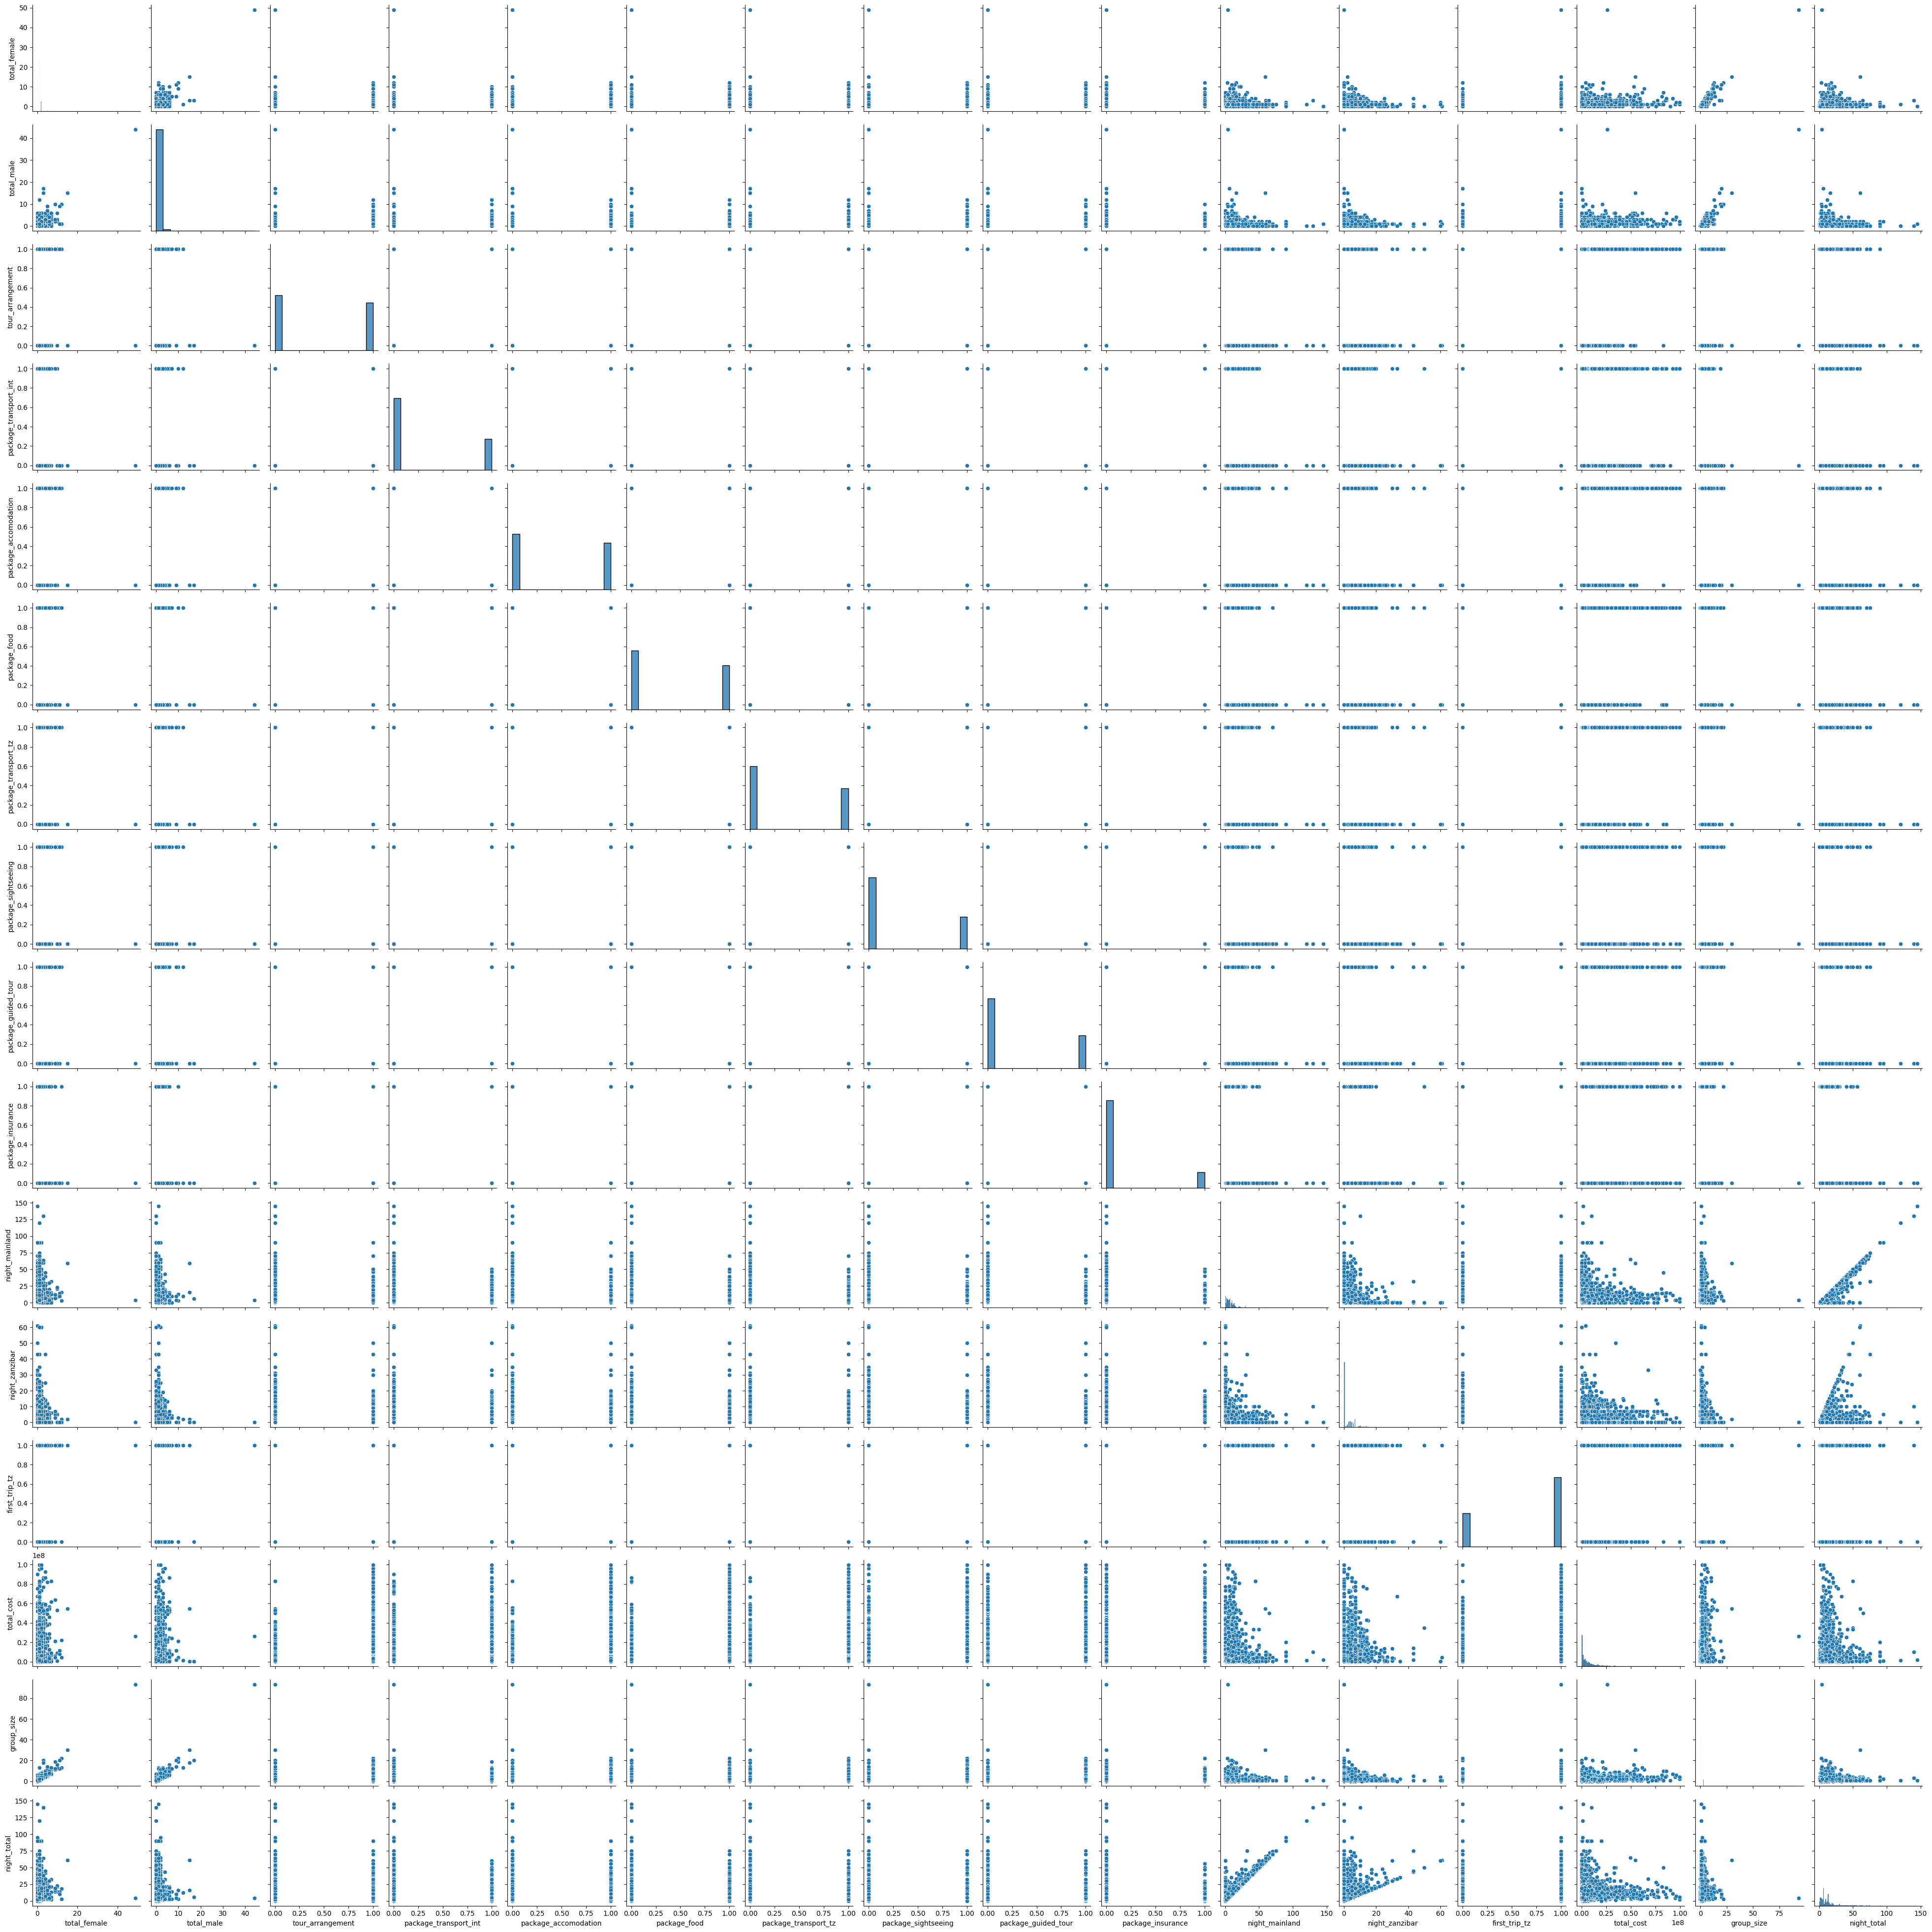

In [90]:
sns.pairplot(data)

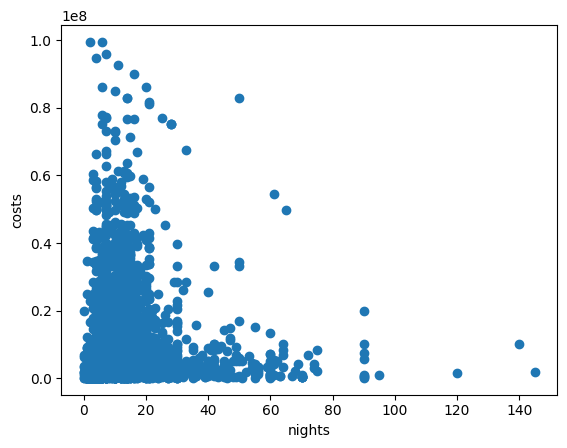

In [91]:
plt.scatter(data.night_total, data.total_cost)
plt.xlabel("nights")
plt.ylabel("costs")
plt.show()

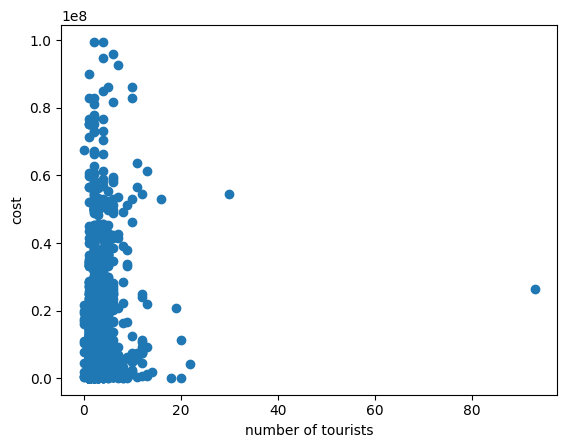

In [92]:
plt.scatter(data.group_size, data.total_cost)
plt.xlabel("number of tourists")
plt.ylabel("cost")
plt.show()

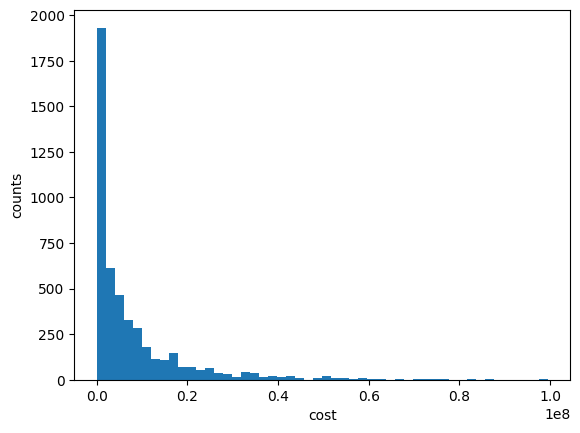

In [93]:
plt.hist(data.total_cost, bins=50)
plt.xlabel("cost")
plt.ylabel("counts")
plt.show()

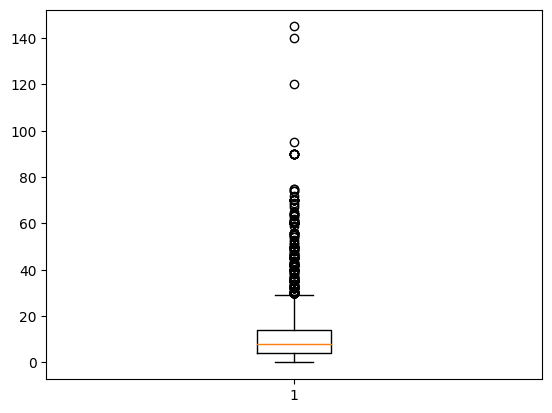

In [94]:
plt.boxplot(data.night_total)
plt.show()

In [96]:
exam = exam.dropna(subset=['total_male', 'total_female'])
exam.most_impressing = exam.most_impressing.fillna("Friendly People")
exam['travel_with'].fillna('Alone', inplace=True)
condition_exam = (exam.travel_with == "Alone") & ((exam.total_female + exam.total_male) > 1)
exam.drop(exam[condition_exam].index, inplace=True)
exam.country = exam.country.replace(country_replace)
exam = exam.astype(int_dict)
exam = exam.replace(yes_no_dict)
exam = exam.replace(tour_dict)
exam["group_size"] = exam.total_male + exam.total_female
exam["night_total"] = exam.night_mainland + exam.night_zanzibar

exam


,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,group_size,night_total
0,tour_1,AUSTRALIA,45-64,Spouse,1,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",1,...,1,1,1,10,3,Cash,1,Wildlife,2,13
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0,4,Business,Wildlife tourism,Tanzania Mission Abroad,1,...,0,0,0,13,0,Cash,0,"Wonderful Country, Landscape, Nature",4,13
2,tour_1001,GERMANY,25-44,Friends/Relatives,3,0,Leisure and Holidays,Beach tourism,"Friends, relatives",0,...,0,0,0,7,14,Cash,0,No comments,3,21
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2,0,Leisure and Holidays,Cultural tourism,others,0,...,0,0,0,0,4,Cash,1,Friendly People,2,4
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2,2,Leisure and Holidays,Wildlife tourism,"Friends, relatives",1,...,0,0,0,10,0,Cash,1,Friendly People,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,tour_988,UNITED STATES OF AMERICA,25-44,Alone,0,1,Meetings and Conference,Mountain climbing,"Newspaper, magazines,brochures",0,...,0,0,0,1,0,Cash,0,Friendly People,1,1
1597,tour_990,ITALY,45-64,Spouse and Children,3,1,Leisure and Holidays,Wildlife tourism,"Friends, relatives",1,...,1,0,0,10,5,Other,1,Wildlife,4,15
1598,tour_992,FINLAND,25-44,Alone,0,1,Meetings and Conference,Mountain climbing,"Friends, relatives",0,...,0,0,0,6,0,Cash,1,No comments,1,6
1599,tour_996,SOUTH AFRICA,24-Jan,Alone,0,1,Business,Beach tourism,"Friends, relatives",0,...,0,0,0,4,0,Cash,1,Wildlife,1,4


In [97]:
exam.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1591 entries, 0 to 1600
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     1591 non-null   object
 1   country                1591 non-null   object
 2   age_group              1591 non-null   object
 3   travel_with            1591 non-null   object
 4   total_female           1591 non-null   int64 
 5   total_male             1591 non-null   int64 
 6   purpose                1591 non-null   object
 7   main_activity          1591 non-null   object
 8   info_source            1591 non-null   object
 9   tour_arrangement       1591 non-null   int64 
 10  package_transport_int  1591 non-null   int64 
 11  package_accomodation   1591 non-null   int64 
 12  package_food           1591 non-null   int64 
 13  package_transport_tz   1591 non-null   int64 
 14  package_sightseeing    1591 non-null   int64 
 15  package_guided_tour    159

In [98]:
data.to_csv("data/data_cleaned.csv")
exam.to_csv("data/exam_cleaned.csv")

## Splitting data for testing 

In [ ]:
from sklearn.model_selection import train_test_split

In [99]:
#Define features and targets for baseline model
X_base = data[["group_size", "night_total"]]
y = data.total_cost

print(X_base.shape, y.shape)

(4772, 2) (4772,)


In [101]:
X_base_train, X_base_test, y_train, y_test = train_test_split(X_base, y, test_size = 0.25, random_state=42)

In [119]:
#Scale nuerical features -> group size, nights
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_min_max = MinMaxScaler()
scaler_std = StandardScaler()

X_base_train = scaler_min_max.fit_transform(X_base_train)
X_base_test = scaler_min_max.transform(X_base_test)

y_mean = np.mean(y_train)
y_std = np.std(y_train)

y_train_scaled = (y_train - y_mean)/y_std
y_test_scaled = (y_test - y_mean)/y_std
#y_train_scaled = scaler_std.fit_transform(y_train)
#y_test_scaled = scaler_std.transform(y_test)

## Train the Baseline model

In [112]:
from sklearn.linear_model import LinearRegression

In [120]:
lin_reg_min_max = LinearRegression()
lin_reg_min_max.fit(X_base_train, y_train_scaled)

LinearRegression()

In [121]:
y_pred_test = lin_reg_min_max.predict(X_base_test)
y_pred_train = lin_reg_min_max.predict(X_base_train)

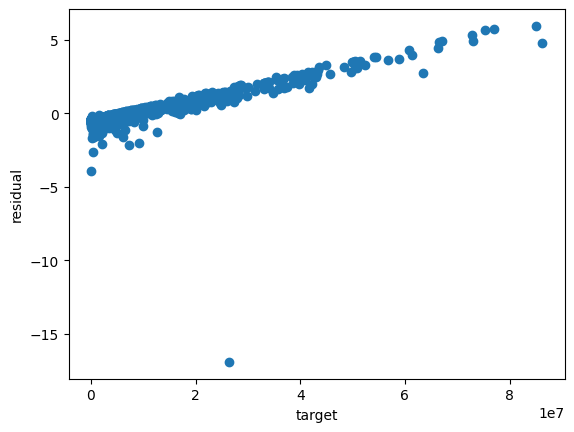

In [122]:
#residual of test set
y_res = y_test_scaled - y_pred_test
plt.scatter(y_test, y_res)
plt.xlabel("target")
plt.ylabel("residual")
plt.show()

In [123]:
from sklearn.metrics import mean_squared_error, r2_score

r2_score_min_max = r2_score(y_test_scaled, y_pred_test)
r2_score_train = r2_score(y_train_scaled, y_pred_train)

print(f"R2 score with MinMaxScaler: Test: {r2_score_min_max}\nTrain: {r2_score_train}")

R2 score with MinMaxScaler: Test: -0.1256438664513284
Train: 0.11884324329334228


In [124]:
rmse_test = mean_squared_error(y_test_scaled, y_pred_test, squared=False)
rmse_train = mean_squared_error(y_train_scaled, y_pred_train, squared=False)

print(f"RMSE with MinMaxScaler: Test: {rmse_test}\nTrain: {rmse_train}")

RMSE with MinMaxScaler: Test: 1.0569311103717163
Train: 0.9386995028797328


In [125]:
print(f"Coefficients: {lin_reg_min_max.coef_}\nIntercept: {lin_reg_min_max.intercept_}")

Coefficients: [6.07839295 0.90793865]
Intercept: -0.4550008466471225
